In [2]:
import matplotlib.pyplot as plt
import numpy as np
from careamics import CAREamist
from careamics.config import create_n2v_configuration
from careamics.utils.metrics import scale_invariant_psnr
from careamics_portfolio import PortfolioManager
from PIL import Image
from microseg.utils.data import load_XY_image
import os
import tifffile

In [8]:
paths = [
    '/Users/anand/Nextcloud/projects/phii_24/data/crosssection/I/C1-Image012.tif',
    # '/Users/anand/Nextcloud/projects/phii_24/data/crosssection/II/C1-Image019.tif',
    # '/Users/anand/Nextcloud/projects/phii_24/data/crosssection/III/C1-Image009.tif',
    # '/Users/anand/Nextcloud/projects/phii_24/data/crosssection/IV/C1-Image014.tif',
]
train_data = np.array([load_XY_image(p) for p in paths]).astype(np.float32)
train_data = train_data / 4096
print(train_data.shape)

(1, 2048, 2048)


[]

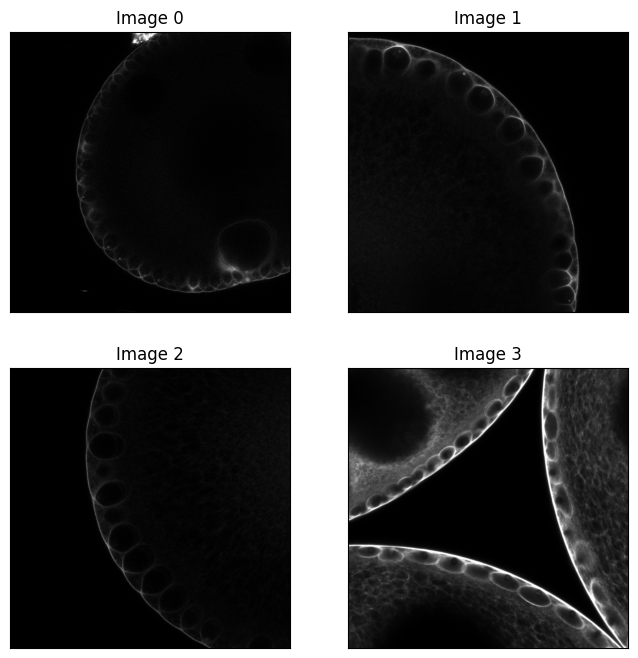

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(train_data[0], cmap="gray")
ax[0, 0].set_title(f"Image {0}")
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])

ax[0, 1].imshow(train_data[1], cmap="gray")
ax[0, 1].set_title(f"Image {1}")
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])

ax[1, 0].imshow(train_data[2], cmap="gray")
ax[1, 0].set_title(f"Image {2}")
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])

ax[1, 1].imshow(train_data[3], cmap="gray")
ax[1, 1].set_title(f"Image {3}")
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])

In [25]:
config = create_n2v_configuration(
    experiment_name="phii_24_n2v",
    data_type="array",
    axes="SYX",
    patch_size=(256, 256),
    batch_size=16,
    num_epochs=100,
)
print(config)

{'algorithm_config': {'algorithm': 'n2v',
                      'loss': 'n2v',
                      'lr_scheduler': {'name': 'ReduceLROnPlateau',
                                       'parameters': {}},
                      'model': {'architecture': 'UNet',
                                'conv_dims': 2,
                                'depth': 2,
                                'final_activation': 'None',
                                'in_channels': 1,
                                'independent_channels': True,
                                'n2v2': False,
                                'num_channels_init': 32,
                                'num_classes': 1},
                      'n2v_config': {'masked_pixel_percentage': 0.2,
                                     'name': 'N2VManipulate',
                                     'remove_center': True,
                                     'roi_size': 11,
                                     'strategy': 'uniform',
                

In [26]:
# instantiate a CAREamist
careamist = CAREamist(source=config)

# train
careamist.train(
    train_source=train_data,
)

No working directory provided. Using current working directory: /Users/anand/Nextcloud/projects/phii_24/code.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Computed dataset mean: [0.02254789], std: [0.05995929]

  | Name  | Type | Params | Mode 
---------------------------------------
0 | model | UNet | 509 K  | train
---------------------------------------
509 K     Trainable params
0         Non-trainable params
509 K     Total params
2.037     Total estimated model params size (MB)
39        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [27]:
prediction = careamist.predict(source=train_data)

Predicting: |          | 0/? [00:00<?, ?it/s]

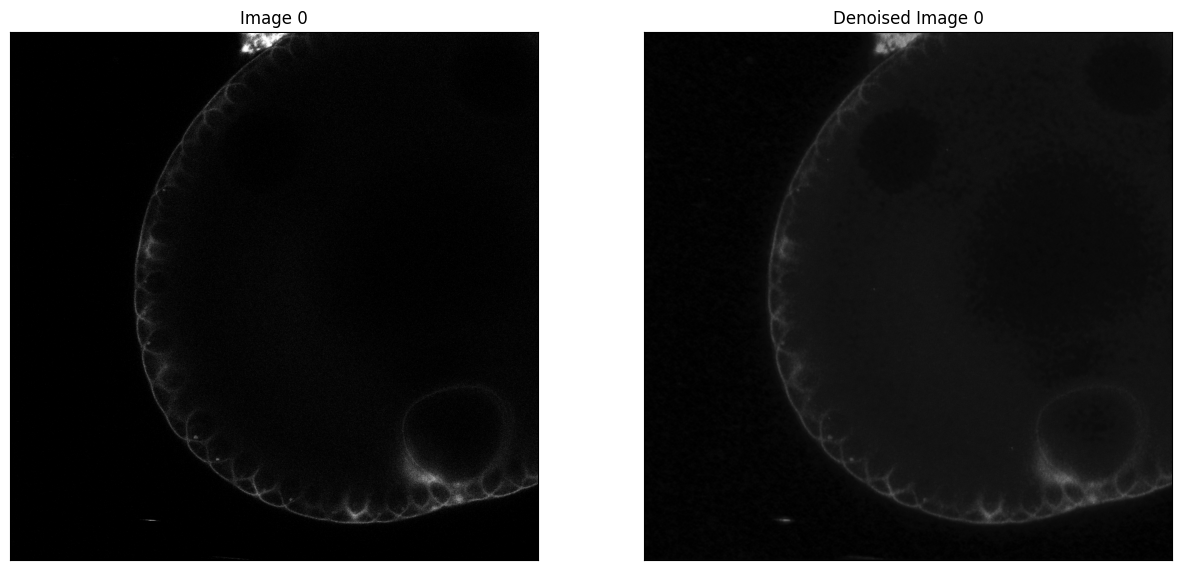

In [28]:

fig, axs = plt.subplots(len(train_data), 2, figsize=(15, 30))
if len(train_data) == 1:
    axs = np.array([axs])  # Convert to 2D array with shape (1, 2)
for i in range(len(train_data)):
    axs[i, 0].imshow(train_data[i], cmap="gray")
    axs[i, 0].set_title(f"Image {i}")
    axs[i, 0].set_xticks([])
    axs[i, 0].set_yticks([])
    axs[i, 1].imshow(prediction[i].squeeze(), cmap="gray")
    axs[i, 1].set_title(f"Denoised Image {i}")
    axs[i, 1].set_xticks([])
    axs[i, 1].set_yticks([])
plt.show()

In [36]:
for i in range(len(train_data)):
    img0 = (train_data[i] * 255).astype(np.uint8)
    img1 = prediction[i].squeeze()
    img1 -= img1.min()
    img1 /= img1.max()
    img1 = (img1 * 255).astype(np.uint8)
    img = np.array([img0, img1])
    path = f'{os.path.splitext(paths[i])[0]}_processed.tif'
    tifffile.imwrite(path, img)

(2, 2048, 2048)
